In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [3]:

df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


## Question: Does the experiment page drive higher traffic than the control page?

In [4]:
# compute the ctr for each group
control_df = df.query('group=="control"')
control_ctr = control_df.query('action=="click"').id.nunique()/control_df.query('action=="view"').id.nunique()
control_ctr

0.2797118847539016

In [5]:
experiment_df = df.query('group=="experiment"')

experiment_ctr = experiment_df.query('action=="click"').id.nunique()/experiment_df.query('action=="view"').id.nunique()
experiment_ctr

0.3097463284379172

In [6]:
# compute observed difference in ctr
obs_diff = experiment_ctr - control_ctr

In [7]:
# display observed difference
obs_diff

0.030034443684015644

In [8]:
# create sampling distribution of difference in ctr
# with boostrapping
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0],replace=True)
    control_df = b_samp.query('group=="control"')
    experiment_df = b_samp.query('group=="experiment"')
    control_ctr = control_df.query('action=="click"').id.nunique()/control_df.query('action=="view"').id.nunique()
    experiment_ctr = experiment_df.query('action=="click"').id.nunique()/experiment_df.query('action=="view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

(array([   6.,   70.,  391., 1381., 2598., 2862., 1791.,  727.,  156.,
          18.]),
 array([-0.01668448, -0.00768051,  0.00132347,  0.01032745,  0.01933143,
         0.02833541,  0.03733938,  0.04634336,  0.05534734,  0.06435132,
         0.0733553 ]),
 <a list of 10 Patch objects>)

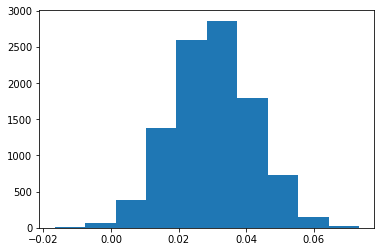

In [10]:
plt.hist(diffs)

In [11]:
# convert to numpy array
diffs = np.array(diffs)

(array([   6.,   70.,  391., 1381., 2598., 2862., 1791.,  727.,  156.,
          18.]),
 array([-0.01668448, -0.00768051,  0.00132347,  0.01032745,  0.01933143,
         0.02833541,  0.03733938,  0.04634336,  0.05534734,  0.06435132,
         0.0733553 ]),
 <a list of 10 Patch objects>)

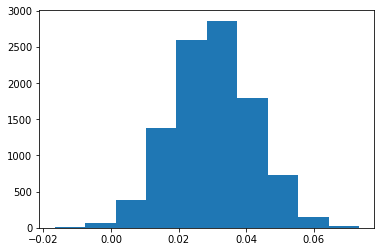

In [12]:
# plot sampling distribution
plt.hist(diffs)

In [13]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0,diffs.std(),diffs.size)

(array([  11.,  108.,  553., 1612., 2649., 2729., 1647.,  583.,   94.,
          14.]),
 array([-0.04520783, -0.03622193, -0.02723603, -0.01825013, -0.00926424,
        -0.00027834,  0.00870756,  0.01769346,  0.02667936,  0.03566526,
         0.04465116]),
 <a list of 10 Patch objects>)

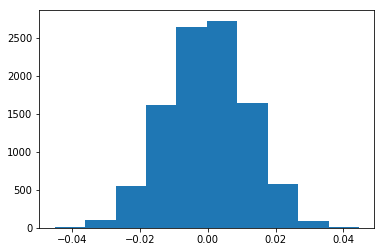

In [14]:
# plot null distribution
plt.hist(null_vals)

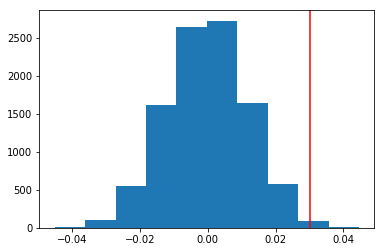

In [16]:
# plot line for observed statistic
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red')

In [17]:
# compute p value
(null_vals > obs_diff).mean()

0.0055